In [1]:
import numpy as np
import matplotlib.pyplot as plt
from action import Action
from typing import List
from tqdm import tqdm


In [2]:

class Bandit:
    def __init__(self, actions: List[Action], epsilon: float) -> None:
        self.actions = actions
        self.epsilon = epsilon
        self.N = np.zeros(len(actions))
        self.Q = np.zeros(len(actions))
        self.true_optimal_action = np.argmax([action.mean_reward for action in actions])

    def reset(self) -> None:
        self.N = np.zeros(len(self.actions))
        self.Q = np.zeros(len(self.actions))


    def act(self) -> int:
        if np.random.rand() < self.epsilon:
            return np.random.randint(len(self.actions))
        else:
            q_best = np.max(self.Q)
            return np.random.choice(np.where(self.Q == q_best)[0])

    def iterate(self,action_index) -> float:
        # Apply only the selected action
        reward = self.actions[action_index].apply()
        # Update Q-values
        self.N[action_index] += 1
        self.Q[action_index] += (reward - self.Q[action_index]) / self.N[action_index]

        return reward

def simulate(runs, time, bandits):
    rewards = np.zeros((len(bandits), runs, time))
    best_action_counts = np.zeros(rewards.shape)
    for i, bandit in enumerate(bandits):
        for r in tqdm(range(runs)):
            bandit.reset()
            for t in range(time):
                action = bandit.act()
                reward = bandit.iterate(action)
                rewards[i, r, t] = reward
                if action == bandit.true_optimal_action:
                    best_action_counts[i, r, t] = 1
    mean_best_action_counts = best_action_counts.mean(axis=1)
    mean_rewards = rewards.mean(axis=1)
    return mean_best_action_counts, mean_rewards


<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:18: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_197233/3000285038.py:11: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(rewards, label='$\epsilon = %.02f$' % (eps))
/tmp/ipykernel_197233/3000285038.py:18: SyntaxWarning: invalid escape sequence '\e'
  plt.plot(counts, label='$\epsilon = %.02f$' % (eps))
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [01:14<00:00, 26.88it/s]


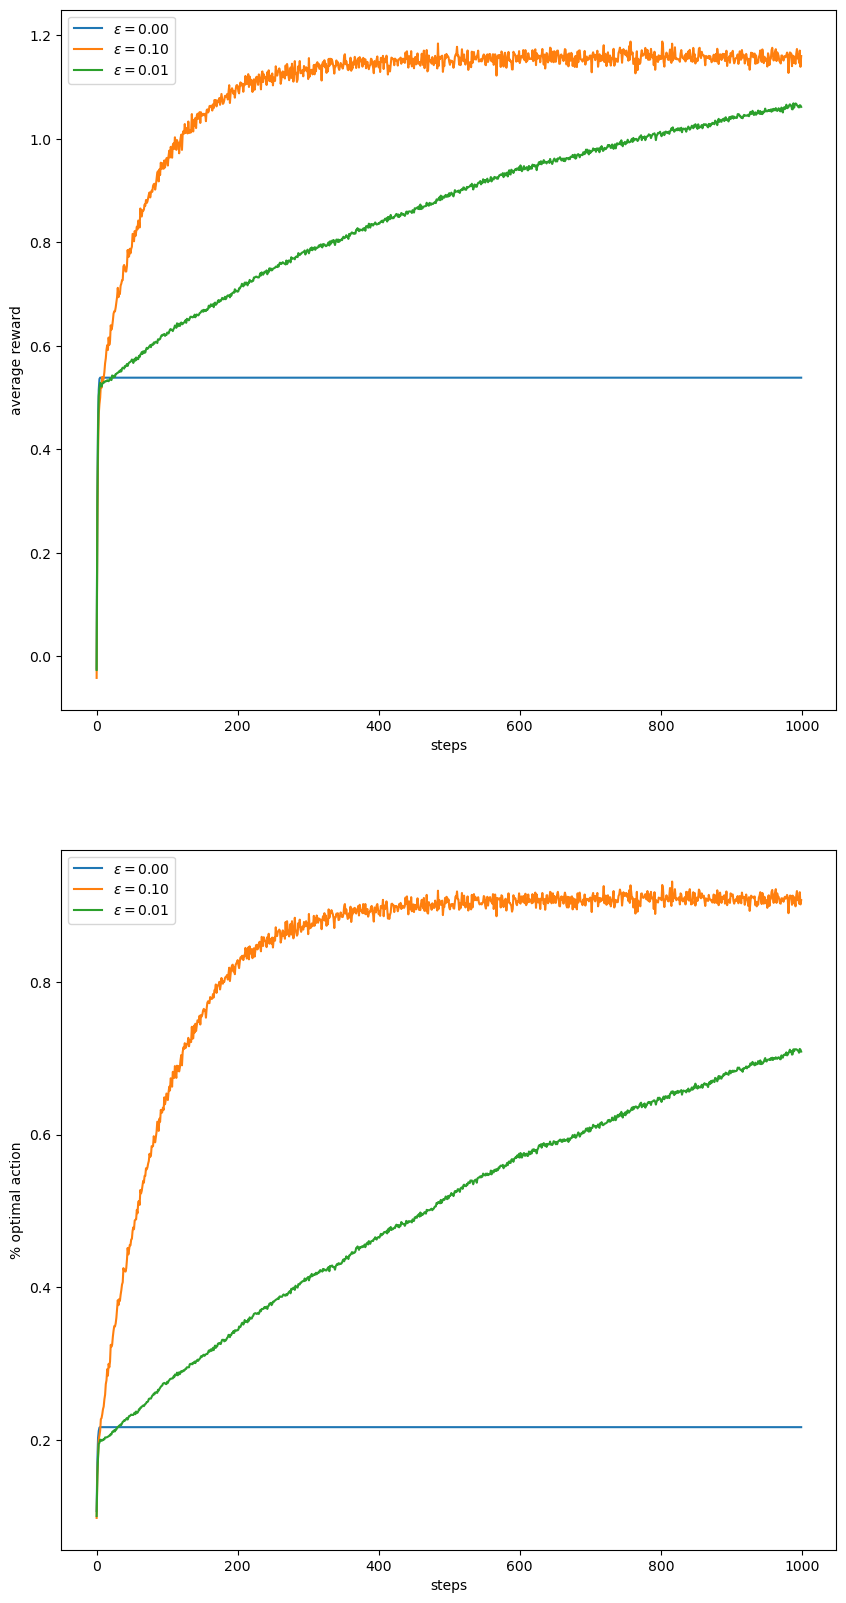

In [5]:
epsilons = [0, 0.1, 0.01]
runs = 2000
time = 1000
actions = [Action(np.random.randn(), 0.0) for _ in range(10)]
bandits = [Bandit(epsilon=eps, actions=actions) for eps in epsilons]
best_action_counts, rewards = simulate(runs, time, bandits)

plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
for eps, rewards in zip(epsilons, rewards):
    plt.plot(rewards, label='$\epsilon = %.02f$' % (eps))
plt.xlabel('steps')
plt.ylabel('average reward')
plt.legend()

plt.subplot(2, 1, 2)
for eps, counts in zip(epsilons, best_action_counts):
    plt.plot(counts, label='$\epsilon = %.02f$' % (eps))
plt.xlabel('steps')
plt.ylabel('% optimal action')
plt.legend()

plt.show()

In [10]:
rewards


array([-0.02624423,  0.28610097,  0.43427881,  0.50300376,  0.51789442,
        0.52879791,  0.52584223,  0.52139632,  0.52665678,  0.52805661,
        0.52979963,  0.52945378,  0.53157867,  0.53186055,  0.53173066,
        0.53360545,  0.53282316,  0.53166887,  0.53359109,  0.53685714,
        0.536401  ,  0.53387603,  0.54283157,  0.54082869,  0.53920349,
        0.54237787,  0.5401894 ,  0.54551706,  0.54580029,  0.54743645,
        0.54774334,  0.54933877,  0.55107451,  0.54996439,  0.55356213,
        0.55062084,  0.55619597,  0.55787023,  0.55728107,  0.55605806,
        0.56096949,  0.5601261 ,  0.56221978,  0.56500511,  0.5611689 ,
        0.56536148,  0.56753598,  0.56835896,  0.56940054,  0.57072307,
        0.57367404,  0.57228406,  0.56692704,  0.57227115,  0.57514597,
        0.57143956,  0.57762001,  0.57375701,  0.57630159,  0.57440201,
        0.58069469,  0.5785585 ,  0.5834141 ,  0.5841294 ,  0.58802839,
        0.58433687,  0.58952701,  0.58632988,  0.5894295 ,  0.58